# Lab 10 - SVMs - Decision Trees - Random Forests
- **Author:** Qutub Khan Vajihi
- **Date:** 7th April 2021
- **Course:** INFO 251: Applied machine learning

In [1]:
import pandas as pd
import numpy as np
import os
import time
from matplotlib import gridspec
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import IPython

%matplotlib inline


### Topics:
1. Support vector machines (SVMs)
2. Decision Trees
3. Random Forests


## Data: 
Cancer dataset. Labels malignant or benign. Features include mean radius, mean texture, mean perimeter etc 

In [2]:
cancer = datasets.load_breast_cancer()
print("######## Features ########")
print("Features: ", cancer.feature_names)


######## Features ########
Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [3]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
print("######## Labels ########")
# 0-malignant, 1-benign
print("Labels: ", cancer.target_names)
print("######## Size ########")
print("{} data points and with {} features".format(cancer.data.shape[0],cancer.data.shape[1]))

######## Labels ########
Labels:  ['malignant' 'benign']
######## Size ########
569 data points and with 30 features


## Feature selection

**SelectKBest** selects the k highest scoring features according to a specified criterion.

For example, in a classification scenario with mutual information criterion:

* SelectKBest computes a score between each feature of X and y

* Score: Mutual information between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

Read more :-
* https://en.wikipedia.org/wiki/Mutual_information 
* https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif
* https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html



In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
# Split data in train and test sets
# 80% train 20% test

X_total = cancer.data
y = cancer.target
# 
selector = SelectKBest(mutual_info_classif, k=5)
X = selector.fit_transform(X_total, y)
# Chosen features selector.get_support()

features = cancer.feature_names[selector.get_support()]
#IPython.embed()

#X = X_total[:, 0:10]
#IPython.embed()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109) 
X_train.shape

(455, 5)

In [6]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

## SVMs

We will use the standard sklearn function. Here are some important parameters - 
* C : float, default=1.0
    * Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.

* kernel : {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
    * Specifies the kernel type to be used in the algorithm. 

* degree: int, default=3
    * Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

In [7]:
from sklearn import svm
# Create a model
clf = svm.SVC(kernel='linear') 
# SVC params: C (regularization penalty)

# Train model
clf.fit(X_train, y_train)
# Get coefficient and intercept
print(clf.coef_)
print(clf.intercept_)
# Predict response 
y_pred = clf.predict(X_test)
print("Accuracy of SVM is {}".format(sum(y_pred==y_test)/len(y_test)))

[[-0.90930223  0.44257531 -0.11789705 -0.00222053 -2.18356368]]
[7.86276766]
Accuracy of SVM is 0.956140350877193


In [8]:
from sklearn import svm
# Create a model
clf = svm.SVC(kernel='poly', degree=10) 
# SVC params: C (regularization penalty)

# Train model
clf.fit(X_train, y_train)
# Get coefficient and intercept
#print(clf.coef_)
print(clf.intercept_)
# Predict response 
y_pred = clf.predict(X_test)
print("Accuracy of SVM is {}".format(sum(y_pred==y_test)/len(y_test)))

[1.04505854]
Accuracy of SVM is 0.9385964912280702


In [9]:
from sklearn import svm
# Create a model
clf = svm.SVC(kernel='rbf') 
# SVC params: C (regularization penalty)

# Train model
clf.fit(X_train, y_train)
print(clf.intercept_)
# Predict response 
y_pred = clf.predict(X_test)
print("Accuracy of SVM is {}".format(sum(y_pred==y_test)/len(y_test)))

[-0.67859131]
Accuracy of SVM is 0.956140350877193


## Decision Trees

Again, let's try the sklearn implementation for Decision Tree Classifier. Note that DT can also be used for regression. 

For the quality of split, we usually use Gini Index or Information Gain. Here are some differences - 
* Gini’s maximum impurity is 0.5 and maximum purity is 0
* Entropy’s maximum impurity is 1 and maximum purity is 0
* Different decision tree algorithms utilize different impurity metrics: CART uses Gini; ID3 and C4.5 use Entropy. This is worth looking into before you use decision trees /random forests in your model.

In [10]:
from sklearn import tree
from sklearn.model_selection import KFold, train_test_split

In [11]:
# useful params: criterion='entropy', max_depth (for prunning)
model = tree.DecisionTreeClassifier(criterion='gini')
model.fit(X_train, y_train)
print(model.get_n_leaves())
print(model.get_depth())
predict_labels = model.predict(X_test)
print("Accuracy of decision tree is {}".format(sum(predict_labels==y_test)/len(y_test)))

31
8
Accuracy of decision tree is 0.9298245614035088


In [12]:
# useful params: criterion='entropy', max_depth (for prunning)
model = tree.DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(X_train, y_train)
print(model.get_n_leaves())
print(model.get_depth())
predict_labels = model.predict(X_test)
print("Accuracy of decision tree is {}".format(sum(predict_labels==y_test)/len(y_test)))

8
3
Accuracy of decision tree is 0.956140350877193


Let's also try Entropy once :-

In [13]:
# useful params: criterion='entropy', max_depth (for prunning)
model = tree.DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
print(model.get_n_leaves())
print(model.get_depth())
predict_labels = model.predict(X_test)
print("Accuracy of decision tree is {}".format(sum(predict_labels==y_test)/len(y_test)))

30
11
Accuracy of decision tree is 0.9473684210526315


## Plot tree

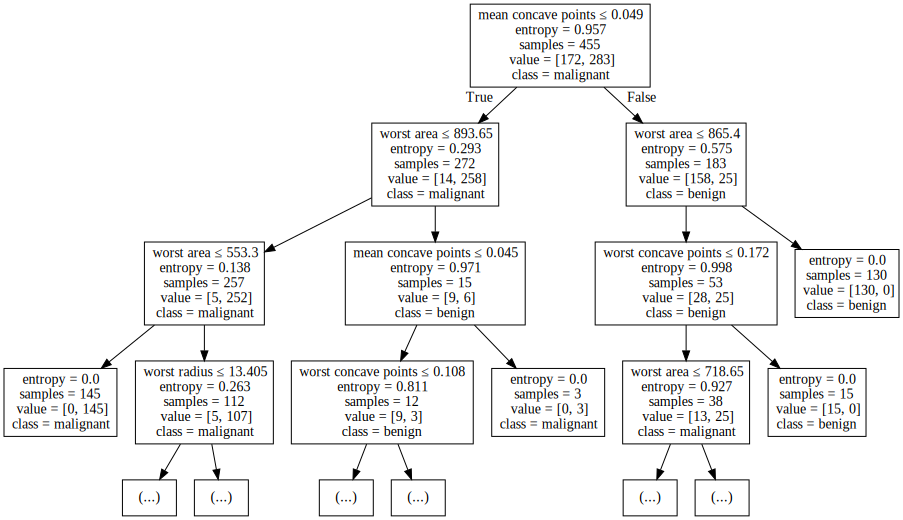

In [14]:
import graphviz 

# this package is helpful in plotting the trees
dot_data = tree.export_graphviz(model, out_file=None,
                                class_names=['benign','malignant'], 
                                feature_names=features,
                                special_characters=True, max_depth=3)
graph = graphviz.Source(dot_data)
graph

In [ ]:
X

## Random Forests
Finally, let's try the Random Forest model. 

In [15]:
from sklearn.ensemble import RandomForestClassifier
k = 5
clf = RandomForestClassifier(criterion='entropy', max_depth=k)
# params: n_estimators=100 (number of trees in the forest), criterion (eg entropy),
# max_features how many features at each split defualt max_features=sqrt(n_features)
clf.fit(X_train, y_train)
predict_labels = clf.predict(X_test)
print("Accuracy of decision tree is {}".format(sum(predict_labels==y_test)/len(y_test)))


Accuracy of decision tree is 0.9736842105263158
